# Model Insights Using Classification Models

## Loading the Data

In [1]:
## Importing custom function for project
%load_ext autoreload
%autoreload 2
import project_functions as pf

In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

##import statsmodels correctly
import statsmodels.api as sm

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
pd.set_option('display.max_columns',100)

### 📚 Finding & Loading Batches of Files with `glob`

In [5]:
## Checking what data we already in our Data folder using os.listdir
import os
FOLDER = 'Data-Previous/tmdb/'
file_list = sorted(os.listdir(FOLDER))
file_list

['combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz']

In [6]:
df = pd.read_csv(FOLDER+'combined_tmdb_api_data.csv.gz',lineterminator='\n')
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
4,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",4.889,/s6yQFnJohmvdkbeHbx6fFOTpYwR.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,A son tries to save his mother's eyesight by d...,0.840,/miPUS4bMvooEWUpq8kbC0j7oCie.jpg,"[{'id': 154995, 'logo_path': None, 'name': 'AS...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2021-09-08,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
60126,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,A college freshman confronts her parents’ valu...,3.665,/2cUczTzLq1F99Pgiw6BWFsKnD7J.jpg,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-11-19,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
60127,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,When a mysterious animal attack leaves a mutil...,421.143,/kvhrltQIRp1u84ao9uj52YPaWNY.jpg,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-01-21,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en

# Preprocessing

In [7]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage', 'status',
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.491,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.974,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.341,[],2000-04-14,0.0,152.0,Gang,0.0,0.0,NaN
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",22.411,"[{'id': 539, 'logo_path': None, 'name': 'Block...",2000-09-29,12854953.0,99.0,In the Mood for Love,8.1,1868.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",4.889,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...",2000-09-02,0.0,99.0,Chinese Coffee,6.9,46.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt9895024,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",0.840,"[{'id': 154995, 'logo_path': None, 'name': 'AS...",2021-09-08,0.0,118.0,Heiko's World,0.0,0.0,NaN
60126,tt9896876,0.0,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.665,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...",2021-11-19,0.0,101.0,India Sweets and Spices,6.0,2.0,PG-13
60127,tt9898844,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",421.143,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...",2022-01-21,0.0,91.0,The Hunting,4.9,20.0,NaN
60128,tt9900940,0.0,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",3.416,"[{'id': 91999, 'logo_path': None, 'name': 'Luc...",2021-12-07,0.0,87.0,The Scrapper,6.0,2.0,NaN


### Check Duplicates

In [8]:
df.duplicated(subset=['imdb_id']).sum()

0

### Set Index - tmdb_id 

In [9]:
df = df.set_index('imdb_id')
df

,adult,belongs_to_collection,budget,genres,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,certification
imdb_id,,,,,,,,,,,,,
tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.491,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN
tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.974,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN
tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.341,[],2000-04-14,0.0,152.0,Gang,0.0,0.0,NaN
tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",22.411,"[{'id': 539, 'logo_path': None, 'name': 'Block...",2000-09-29,12854953.0,99.0,In the Mood for Love,8.1,1868.0,PG
tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",4.889,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...",2000-09-02,0.0,99.0,Chinese Coffee,6.9,46.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9895024,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",0.840,"[{'id': 154995, 'logo_path': None, 'name': 'AS...",2021-09-08,0.0,118.0,Heiko's World,0.0,0.0,NaN
tt9896876,0.0,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.665,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...",2021-11-19,0.0,101.0,India Sweets and Spices,6.0,2.0,PG-13
tt9898844,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",421.143,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...",2022-01-21,0.0,91.0,The Hunting,4.9,20.0,NaN


## Feature Engineering


- Collection: convert to boolean
- Genres: get just name and OHE
- Cleaning Certification
- Converting release date to year, month, and day.

#### belongs to collection

In [10]:
# there are 3,700+ movies that belong to collections
df['belongs_to_collection'].notna().sum()

3738

In [11]:
## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    56392
True      3738
Name: belongs_to_collection, dtype: int64

#### Converting year to sep features

In [12]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
df['DayofWeek'] = df['release_date'].dt.day_name()
df['MonthName'] = df['release_date'].dt.month_name()
df['YearReleased'] = df['release_date'].dt.year

In [14]:
df

,adult,belongs_to_collection,budget,genres,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,certification,DayofWeek,MonthName,YearReleased
imdb_id,,,,,,,,,,,,,,,,
tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.491,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN,Friday,September,2000.0
tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.974,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN,Wednesday,November,2000.0
tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.341,[],2000-04-14,0.0,152.0,Gang,0.0,0.0,NaN,Friday,April,2000.0
tt0118694,0.0,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",22.411,"[{'id': 539, 'logo_path': None, 'name': 'Block...",2000-09-29,12854953.0,99.0,In the Mood for Love,8.1,1868.0,PG,Friday,September,2000.0
tt0118852,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",4.889,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...",2000-09-02,0.0,99.0,Chinese Coffee,6.9,46.0,R,Saturday,September,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9895024,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",0.840,"[{'id': 154995, 'logo_path': None, 'name': 'AS...",2021-09-08,0.0,118.0,Heiko's World,0.0,0.0,NaN,Wednesday,September,2021.0
tt9896876,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.665,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...",2021-11-19,0.0,101.0,India Sweets and Spices,6.0,2.0,PG-13,Friday,November,2021.0
tt9898844,0.0,False,0.0,"[{'id': 27, 'name': 'Horror'}]",421.143,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...",2022-01-21,0.0,91.0,The Hunting,4.9,20.0,NaN,Friday,January,2022.0


In [15]:
# ## split release date into 3 columns
# new_cols = ['year','month','day']
# df[new_cols] = df['release_date'].str.split('-',expand=True)
# df[new_cols] = df[new_cols].astype(float)
# ## drop original feature
df = df.drop(columns=['release_date'])
df

,adult,belongs_to_collection,budget,genres,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,certification,DayofWeek,MonthName,YearReleased
imdb_id,,,,,,,,,,,,,,,
tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.491,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",0.0,86.0,The Fantasticks,5.4,21.0,NaN,Friday,September,2000.0
tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.974,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",0.0,100.0,For the Cause,4.4,7.0,NaN,Wednesday,November,2000.0
tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.341,[],0.0,152.0,Gang,0.0,0.0,NaN,Friday,April,2000.0
tt0118694,0.0,False,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",22.411,"[{'id': 539, 'logo_path': None, 'name': 'Block...",12854953.0,99.0,In the Mood for Love,8.1,1868.0,PG,Friday,September,2000.0
tt0118852,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",4.889,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...",0.0,99.0,Chinese Coffee,6.9,46.0,R,Saturday,September,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9895024,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",0.840,"[{'id': 154995, 'logo_path': None, 'name': 'AS...",0.0,118.0,Heiko's World,0.0,0.0,NaN,Wednesday,September,2021.0
tt9896876,0.0,False,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",3.665,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...",0.0,101.0,India Sweets and Spices,6.0,2.0,PG-13,Friday,November,2021.0
tt9898844,0.0,False,0.0,"[{'id': 27, 'name': 'Horror'}]",421.143,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...",0.0,91.0,The Hunting,4.9,20.0,NaN,Friday,January,2022.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60130 entries, tt0113026 to tt9907782
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  60130 non-null  float64
 1   belongs_to_collection  60130 non-null  bool   
 2   budget                 60130 non-null  float64
 3   genres                 60130 non-null  object 
 4   popularity             60130 non-null  float64
 5   production_companies   60130 non-null  object 
 6   revenue                60130 non-null  float64
 7   runtime                59298 non-null  float64
 8   title                  60130 non-null  object 
 9   vote_average           60130 non-null  float64
 10  vote_count             60130 non-null  float64
 11  certification          14624 non-null  object 
 12  DayofWeek              59078 non-null  object 
 13  MonthName              59078 non-null  object 
 14  YearReleased           59078 non-null  float64


#### genre

In [17]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [18]:
## Use ourn function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode

,adult,belongs_to_collection,budget,genres,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,certification,DayofWeek,MonthName,YearReleased,genres_list
imdb_id,,,,,,,,,,,,,,,,
tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.491,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",0.0,86.0,The Fantasticks,5.4,21.0,NaN,Friday,September,2000.0,Comedy
tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.491,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",0.0,86.0,The Fantasticks,5.4,21.0,NaN,Friday,September,2000.0,Music
tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.491,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",0.0,86.0,The Fantasticks,5.4,21.0,NaN,Friday,September,2000.0,Romance
tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.974,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",0.0,100.0,For the Cause,4.4,7.0,NaN,Wednesday,November,2000.0,Science Fiction
tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.341,[],0.0,152.0,Gang,0.0,0.0,NaN,Friday,April,2000.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9900940,0.0,False,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",3.416,"[{'id': 91999, 'logo_path': None, 'name': 'Luc...",0.0,87.0,The Scrapper,6.0,2.0,NaN,Tuesday,December,2021.0,Drama
tt9900940,0.0,False,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",3.416,"[{'id': 91999, 'logo_path': None, 'name': 'Luc...",0.0,87.0,The Scrapper,6.0,2.0,NaN,Tuesday,December,2021.0,Thriller
tt9907782,0.0,False,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",22.184,"[{'id': 26065, 'logo_path': None, 'name': 'Pis...",4588389.0,111.0,The Cursed,7.0,55.0,R,Wednesday,July,2021.0,Horror


In [19]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()

## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    

## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])
df

,adult,belongs_to_collection,budget,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,certification,DayofWeek,MonthName,YearReleased,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0113026,0.0,False,10000000.0,2.491,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...",0.0,86.0,The Fantasticks,5.4,21.0,NaN,Friday,September,2000.0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0113092,0.0,False,0.0,1.974,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...",0.0,100.0,For the Cause,4.4,7.0,NaN,Wednesday,November,2000.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0116391,0.0,False,0.0,1.341,[],0.0,152.0,Gang,0.0,0.0,NaN,Friday,April,2000.0,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
tt0118694,0.0,False,150000.0,22.411,"[{'id': 539, 'logo_path': None, 'name': 'Block...",12854953.0,99.0,In the Mood for Love,8.1,1868.0,PG,Friday,September,2000.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0118852,0.0,False,0.0,4.889,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...",0.0,99.0,Chinese Coffee,6.9,46.0,R,Saturday,September,2000.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9895024,0.0,False,0.0,0.840,"[{'id': 154995, 'logo_path': None, 'name': 'AS...",0.0,118.0,Heiko's World,0.0,0.0,NaN,Wednesday,September,2021.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt9896876,0.0,False,0.0,3.665,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...",0.0,101.0,India Sweets and Spices,6.0,2.0,PG-13,Friday,November,2021.0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt9898844,0.0,False,0.0,421.143,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...",0.0,91.0,The Hunting,4.9,20.0,NaN,Friday,January,2022.0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


#### certification

In [20]:
## Checking Certification values
# df['certification'].value_counts(dropna=False)

# fix extra space certs
df['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      45507
R         6098
NR        3270
PG-13     3225
PG        1432
G          442
NC-17      156
Name: certification, dtype: int64

### Production Company

In [21]:
df['production_companies']

imdb_id
tt0113026    [{'id': 51207, 'logo_path': None, 'name': 'Sul...
tt0113092    [{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...
tt0116391                                                   []
tt0118694    [{'id': 539, 'logo_path': None, 'name': 'Block...
tt0118852    [{'id': 67930, 'logo_path': None, 'name': 'Cha...
                                   ...                        
tt9895024    [{'id': 154995, 'logo_path': None, 'name': 'AS...
tt9896876    [{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...
tt9898844    [{'id': 160303, 'logo_path': None, 'name': 'Mo...
tt9900940    [{'id': 91999, 'logo_path': None, 'name': 'Luc...
tt9907782    [{'id': 26065, 'logo_path': None, 'name': 'Pis...
Name: production_companies, Length: 60130, dtype: object

In [22]:
## getting longest string to check for multiple companies
idxmax = df['production_companies'].apply(len).idxmax()
idxmax 

'tt10534996'

In [23]:
test = df.loc[idxmax, 'production_companies']
test

'[{\'id\': 130159, \'logo_path\': None, \'name\': "Les Films d\'Ici Méditerranée", \'origin_country\': \'\'}, {\'id\': 76921, \'logo_path\': \'/2r3bPkN23MRdAD1iaTKVfK8NtEQ.png\', \'name\': "Les Films d\'ici", \'origin_country\': \'FR\'}, {\'id\': 8207, \'logo_path\': \'/bpRMgSXme9kr20DJmxSlTm5RaIA.png\', \'name\': \'La Fabrique\', \'origin_country\': \'FR\'}, {\'id\': 130160, \'logo_path\': \'/4ZSZjnqP69Q038EtLBgxvxpkPGt.png\', \'name\': \'Les Films du poisson rouge\', \'origin_country\': \'FR\'}, {\'id\': 109277, \'logo_path\': \'/v72liG1pSzELfBbVKXgTz7AItO6.png\', \'name\': \'Tchack\', \'origin_country\': \'FR\'}, {\'id\': 130161, \'logo_path\': None, \'name\': \'Promenons-nous dans les bois\', \'origin_country\': \'\'}, {\'id\': 11794, \'logo_path\': \'/vjyzeaIhRdtMfDIVGAECNirIkGw.png\', \'name\': \'Lunanime\', \'origin_country\': \'BE\'}, {\'id\': 130162, \'logo_path\': None, \'name\': \'In Efecto\', \'origin_country\': \'\'}, {\'id\': 130163, \'logo_path\': None, \'name\': \'Imagi

In [24]:
# using regular expressions to extrap just the name
import re
exp= r"\'name\'\:.?\'(\w*.*?)\'"
re.findall(exp, test)

['La Fabrique',
 'Les Films du poisson rouge',
 'Tchack',
 'Promenons-nous dans les bois',
 'Lunanime',
 'In Efecto',
 'Imagic Telecom',
 'B-Water Animation Studios',
 'CNC',
 'La Procirep-Angoa',
 'Région Nouvelle-Aquitaine',
 'Région Grand Est',
 'France 3 Cinéma',
 'Les Fées Spéciales',
 'Piste Rouge',
 'Upside Films',
 'Palatine Etoile 16',
 'Région Occitanie/Pyrénées-Méditerranée',
 'Département de la Charente',
 'Association Beaumarchais',
 'Musée Mémorial du Camp de Rivesaltes',
 'Tax Shelter du Gouvernement Fédéral Belge',
 'Belga Productions',
 'Investisseurs Tax Shelter',
 'France Télévisions',
 'Sacem',
 'TV3']

In [25]:
def get_prod_company_names(x):
    if x=='[]':
        return ["MISSING"]
    
    exp= r"\'name\'\:.?\'(\w*.*?)\'"
    companies = re.findall(exp, x)
    return companies

In [26]:
## test function
get_prod_company_names(test)

['La Fabrique',
 'Les Films du poisson rouge',
 'Tchack',
 'Promenons-nous dans les bois',
 'Lunanime',
 'In Efecto',
 'Imagic Telecom',
 'B-Water Animation Studios',
 'CNC',
 'La Procirep-Angoa',
 'Région Nouvelle-Aquitaine',
 'Région Grand Est',
 'France 3 Cinéma',
 'Les Fées Spéciales',
 'Piste Rouge',
 'Upside Films',
 'Palatine Etoile 16',
 'Région Occitanie/Pyrénées-Méditerranée',
 'Département de la Charente',
 'Association Beaumarchais',
 'Musée Mémorial du Camp de Rivesaltes',
 'Tax Shelter du Gouvernement Fédéral Belge',
 'Belga Productions',
 'Investisseurs Tax Shelter',
 'France Télévisions',
 'Sacem',
 'TV3']

In [27]:
## Save new clean prod_comapny col and explode
df['prod_company'] = df['production_companies'].apply(get_prod_company_names)
prod_companies = df['prod_company'].explode()
prod_companies.value_counts().head(49)

MISSING                                   20878
Canal+                                      574
Warner Bros. Pictures                       385
Universal Pictures                          360
CNC                                         302
Columbia Pictures                           268
France 2 Cinéma                             263
CJ Entertainment                            238
Lionsgate                                   238
StudioCanal                                 232
RAI                                         226
Paramount                                   215
ARTE France Cinéma                          212
Ciné+                                       207
20th Century Fox                            206
Toho                                        199
France 3 Cinéma                             199
Film i Väst                                 188
ZDF                                         176
New Line Cinema                             171
BBC Films                               

In [28]:
prod_companies.nunique()

34163

In [29]:
# df['prod_company'].nunique()

- Common Prod Company Encoding:
    - Keep top 50 most common companies an one hot encode

In [30]:
## saving the 50 most common companies
common_companies = sorted(prod_companies.value_counts().head(50).index)
common_companies

['01 Distribution',
 '20th Century Fox',
 'ARD',
 'ARTE',
 'ARTE France Cinéma',
 'BBC Films',
 'Blumhouse Productions',
 'CJ Entertainment',
 'CNC',
 'Canal+',
 'Ciné+',
 'Columbia Pictures',
 'DreamWorks Pictures',
 'Eurimages',
 'Film i Väst',
 'Film4 Productions',
 'Focus Features',
 'France 2 Cinéma',
 'France 3 Cinéma',
 'France Télévisions',
 'Ingenious Media',
 'Kadokawa',
 'Lionsgate',
 'Lotte Entertainment',
 'MISSING',
 'Metro-Goldwyn-Mayer',
 'MiBAC',
 'Miramax',
 'New Line Cinema',
 'Nordisk Film',
 'Paramount',
 'RAI',
 'Relativity Media',
 'Shochiku',
 'Showbox',
 'Star Cinema – ABS-CBN Film Productions',
 'StudioCanal',
 'TF1 Films Production',
 'TVE',
 'The Asylum',
 'Toei Company',
 'Toho',
 'Téléfilm Canada',
 'Universal Pictures',
 'Village Roadshow Pictures',
 'Walt Disney Pictures',
 'Warner Bros. Pictures',
 'Wild Bunch',
 'ZDF',
 'Česká televize']

In [31]:
## manually ohe top 20 companies
for company in common_companies:
    df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)

In [32]:
df = df.drop(columns=['production_companies','prod_company'])

### Saving Lists of Engineering OHE Cols

In [33]:
## Saving list of one hot encoded feature to easily dorp

genre_cols = list(filter(lambda x: x.startswith('Genre'),df.columns))
prod_comp_cols = list(filter(lambda x: x.startswith('ProdC'),df.columns))

genre_cols,prod_comp_cols

(['Genre_Comedy',
  'Genre_Music',
  'Genre_Romance',
  'Genre_Science Fiction',
  'Genre_Drama',
  'Genre_Action',
  'Genre_Crime',
  'Genre_Adventure',
  'Genre_Animation',
  'Genre_Fantasy',
  'Genre_Horror',
  'Genre_Thriller',
  'Genre_History',
  'Genre_Family',
  'Genre_Mystery',
  'Genre_Western',
  'Genre_War',
  'Genre_TV Movie',
  'Genre_Documentary'],
 ['ProdComp_01 Distribution',
  'ProdComp_20th Century Fox',
  'ProdComp_ARD',
  'ProdComp_ARTE',
  'ProdComp_ARTE France Cinéma',
  'ProdComp_BBC Films',
  'ProdComp_Blumhouse Productions',
  'ProdComp_CJ Entertainment',
  'ProdComp_CNC',
  'ProdComp_Canal+',
  'ProdComp_Ciné+',
  'ProdComp_Columbia Pictures',
  'ProdComp_DreamWorks Pictures',
  'ProdComp_Eurimages',
  'ProdComp_Film i Väst',
  'ProdComp_Film4 Productions',
  'ProdComp_Focus Features',
  'ProdComp_France 2 Cinéma',
  'ProdComp_France 3 Cinéma',
  'ProdComp_France Télévisions',
  'ProdComp_Ingenious Media',
  'ProdComp_Kadokawa',
  'ProdComp_Lionsgate',
  'Pro

## Defining "Successful"

- Want to use ROI but need to be careful about movies with 0's for budget or revenue

In [34]:
## Dropping rows with 0's for budget and revenue
df = df[~(df['revenue']==0) & ~(df['budget']==0)]
df

,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,DayofWeek,MonthName,YearReleased,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,ProdComp_01 Distribution,ProdComp_20th Century Fox,ProdComp_ARD,ProdComp_ARTE,ProdComp_ARTE France Cinéma,ProdComp_BBC Films,ProdComp_Blumhouse Productions,ProdComp_CJ Entertainment,ProdComp_CNC,ProdComp_Canal+,ProdComp_Ciné+,ProdComp_Columbia Pictures,ProdComp_DreamWorks Pictures,ProdComp_Eurimages,ProdComp_Film i Väst,ProdComp_Film4 Productions,ProdComp_Focus Features,ProdComp_France 2 Cinéma,ProdComp_France 3 Cinéma,ProdComp_France Télévisions,ProdComp_Ingenious Media,ProdComp_Kadokawa,ProdComp_Lionsgate,ProdComp_Lotte Entertainment,ProdComp_MISSING,ProdComp_Metro-Goldwyn-Mayer,ProdComp_MiBAC,ProdComp_Miramax,ProdComp_New Line Cinema,ProdComp_Nordisk Film,ProdComp_Paramount,ProdComp_RAI,ProdComp_Relativity Media,ProdComp_Shochiku,ProdComp_Showbox,ProdComp_Star Cinema – ABS-CBN Film Productions,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TVE,ProdComp_The Asylum,ProdComp_Toei Company,ProdComp_Toho,ProdComp_Téléfilm Canada,ProdComp_Universal Pictures,ProdComp_Village Roadshow Pictures,ProdComp_Walt Disney Pictures,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_ZDF,ProdComp_Česká televize
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0118694,0.0,False,150000.0,22.411,12854953.0,99.0,In the Mood for Love,8.1,1868.0,PG,Friday,September,2000.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0120467,0.0,False,120000.0,5.300,14904.0,87.0,Vulgar,5.5,40.0,R,Friday,April,2002.0,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0120630,0.0,True,45000000.0,51.339,224834564.0,84.0,Chicken Run,6.7,3997.0,G,Wednesday,June,2000.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0120753,0.0,False,8000000.0,8.371,105983.0,122.0,The Million Dollar Hotel,5.9,247.0,R,Wednesday,February,2000.0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0120755,0.0,True,125000000.0,26.731,546388105.0,123.0,Mission: Impossible II,6.1,5279.0,PG-13,Wednesday,May,2000.0,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [35]:
# eda_df = df.drop(columns=[*genre_cols,*prod_comp_cols])
# eda_df

In [36]:
df[df['budget']==0]

,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,DayofWeek,MonthName,YearReleased,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,ProdComp_01 Distribution,ProdComp_20th Century Fox,ProdComp_ARD,ProdComp_ARTE,ProdComp_ARTE France Cinéma,ProdComp_BBC Films,ProdComp_Blumhouse Productions,ProdComp_CJ Entertainment,ProdComp_CNC,ProdComp_Canal+,ProdComp_Ciné+,ProdComp_Columbia Pictures,ProdComp_DreamWorks Pictures,ProdComp_Eurimages,ProdComp_Film i Väst,ProdComp_Film4 Productions,ProdComp_Focus Features,ProdComp_France 2 Cinéma,ProdComp_France 3 Cinéma,ProdComp_France Télévisions,ProdComp_Ingenious Media,ProdComp_Kadokawa,ProdComp_Lionsgate,ProdComp_Lotte Entertainment,ProdComp_MISSING,ProdComp_Metro-Goldwyn-Mayer,ProdComp_MiBAC,ProdComp_Miramax,ProdComp_New Line Cinema,ProdComp_Nordisk Film,ProdComp_Paramount,ProdComp_RAI,ProdComp_Relativity Media,ProdComp_Shochiku,ProdComp_Showbox,ProdComp_Star Cinema – ABS-CBN Film Productions,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TVE,ProdComp_The Asylum,ProdComp_Toei Company,ProdComp_Toho,ProdComp_Téléfilm Canada,ProdComp_Universal Pictures,ProdComp_Village Roadshow Pictures,ProdComp_Walt Disney Pictures,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_ZDF,ProdComp_Česká televize
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [37]:
df[df['revenue']==0]

,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,DayofWeek,MonthName,YearReleased,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,ProdComp_01 Distribution,ProdComp_20th Century Fox,ProdComp_ARD,ProdComp_ARTE,ProdComp_ARTE France Cinéma,ProdComp_BBC Films,ProdComp_Blumhouse Productions,ProdComp_CJ Entertainment,ProdComp_CNC,ProdComp_Canal+,ProdComp_Ciné+,ProdComp_Columbia Pictures,ProdComp_DreamWorks Pictures,ProdComp_Eurimages,ProdComp_Film i Väst,ProdComp_Film4 Productions,ProdComp_Focus Features,ProdComp_France 2 Cinéma,ProdComp_France 3 Cinéma,ProdComp_France Télévisions,ProdComp_Ingenious Media,ProdComp_Kadokawa,ProdComp_Lionsgate,ProdComp_Lotte Entertainment,ProdComp_MISSING,ProdComp_Metro-Goldwyn-Mayer,ProdComp_MiBAC,ProdComp_Miramax,ProdComp_New Line Cinema,ProdComp_Nordisk Film,ProdComp_Paramount,ProdComp_RAI,ProdComp_Relativity Media,ProdComp_Shochiku,ProdComp_Showbox,ProdComp_Star Cinema – ABS-CBN Film Productions,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TVE,ProdComp_The Asylum,ProdComp_Toei Company,ProdComp_Toho,ProdComp_Téléfilm Canada,ProdComp_Universal Pictures,ProdComp_Village Roadshow Pictures,ProdComp_Walt Disney Pictures,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_ZDF,ProdComp_Česká televize
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [38]:
df['ROI'] = (df['revenue'] - df['budget']) / df['budget']
df.describe()

,adult,budget,popularity,revenue,runtime,vote_average,vote_count,YearReleased,ROI
count,5090.000000,5.090000e+03,5090.000000,5.090000e+03,5089.000000,5090.000000,5090.000000,5081.000000,5090.000000
mean,0.000196,3.304520e+07,30.285351,9.334415e+07,109.539988,6.295029,1953.316896,2010.562488,44.159480
std,0.014017,4.460417e+07,97.891756,1.894971e+08,21.305930,1.169470,3214.527753,5.725829,1941.236487
min,0.000000,1.000000e+00,0.600000,1.000000e+00,0.000000,0.000000,0.000000,2000.000000,-0.999999
25%,0.000000,5.000000e+06,8.757000,3.788994e+06,95.000000,5.800000,156.000000,2006.000000,-0.376408
50%,0.000000,1.600000e+07,14.421000,2.464006e+07,106.000000,6.400000,720.000000,2011.000000,0.715279
75%,0.000000,4.000000e+07,28.551000,9.442283e+07,121.000000,7.000000,2266.250000,2015.000000,2.596972
max,1.000000,3.800000e+08,5086.675000,2.847246e+09,242.000000,10.000000,31489.000000,2022.000000,133830.945312


<AxesSubplot:ylabel='ROI'>

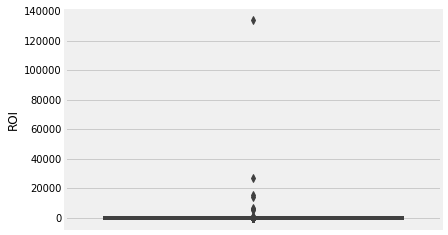

In [39]:
sns.boxplot(data=df, y='ROI')

In [40]:
df[stats.zscore(df['ROI']).abs()>3]

,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,DayofWeek,MonthName,YearReleased,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,ProdComp_01 Distribution,ProdComp_20th Century Fox,ProdComp_ARD,ProdComp_ARTE,ProdComp_ARTE France Cinéma,ProdComp_BBC Films,ProdComp_Blumhouse Productions,ProdComp_CJ Entertainment,ProdComp_CNC,ProdComp_Canal+,ProdComp_Ciné+,ProdComp_Columbia Pictures,ProdComp_DreamWorks Pictures,ProdComp_Eurimages,ProdComp_Film i Väst,ProdComp_Film4 Productions,ProdComp_Focus Features,ProdComp_France 2 Cinéma,ProdComp_France 3 Cinéma,ProdComp_France Télévisions,ProdComp_Ingenious Media,ProdComp_Kadokawa,ProdComp_Lionsgate,ProdComp_Lotte Entertainment,ProdComp_MISSING,ProdComp_Metro-Goldwyn-Mayer,ProdComp_MiBAC,ProdComp_Miramax,ProdComp_New Line Cinema,ProdComp_Nordisk Film,ProdComp_Paramount,ProdComp_RAI,ProdComp_Relativity Media,ProdComp_Shochiku,ProdComp_Showbox,ProdComp_Star Cinema – ABS-CBN Film Productions,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TVE,ProdComp_The Asylum,ProdComp_Toei Company,ProdComp_Toho,ProdComp_Téléfilm Canada,ProdComp_Universal Pictures,ProdComp_Village Roadshow Pictures,ProdComp_Walt Disney Pictures,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_ZDF,ProdComp_Česká televize,ROI
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0404802,0.0,False,90.0,12.687,1410778.0,91.0,The Notorious Bettie Page,6.3,116.0,R,Wednesday,September,2005.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,15674.311111
tt0893412,0.0,False,93.0,9.869,2500000.0,107.0,From Prada to Nada,5.5,279.0,PG-13,Friday,January,2011.0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,26880.720430
tt6416676,0.0,False,528.0,1.707,7436000.0,96.0,Jailbait,6.7,7.0,NaN,Friday,April,2017.0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,14082.333333
tt7914416,0.0,True,30000.0,8.902,200000000.0,96.0,One Cut of the Dead,7.7,485.0,NaN,Saturday,November,2017.0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6665.666667
tt12057168,0.0,False,90.0,325.213,532054.0,92.0,Dark Spell,6.7,94.0,NaN,Thursday,February,2021.0,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [41]:
df = df[stats.zscore(df['ROI']).abs()<=3]
df

,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,certification,DayofWeek,MonthName,YearReleased,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,ProdComp_01 Distribution,ProdComp_20th Century Fox,ProdComp_ARD,ProdComp_ARTE,ProdComp_ARTE France Cinéma,ProdComp_BBC Films,ProdComp_Blumhouse Productions,ProdComp_CJ Entertainment,ProdComp_CNC,ProdComp_Canal+,ProdComp_Ciné+,ProdComp_Columbia Pictures,ProdComp_DreamWorks Pictures,ProdComp_Eurimages,ProdComp_Film i Väst,ProdComp_Film4 Productions,ProdComp_Focus Features,ProdComp_France 2 Cinéma,ProdComp_France 3 Cinéma,ProdComp_France Télévisions,ProdComp_Ingenious Media,ProdComp_Kadokawa,ProdComp_Lionsgate,ProdComp_Lotte Entertainment,ProdComp_MISSING,ProdComp_Metro-Goldwyn-Mayer,ProdComp_MiBAC,ProdComp_Miramax,ProdComp_New Line Cinema,ProdComp_Nordisk Film,ProdComp_Paramount,ProdComp_RAI,ProdComp_Relativity Media,ProdComp_Shochiku,ProdComp_Showbox,ProdComp_Star Cinema – ABS-CBN Film Productions,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TVE,ProdComp_The Asylum,ProdComp_Toei Company,ProdComp_Toho,ProdComp_Téléfilm Canada,ProdComp_Universal Pictures,ProdComp_Village Roadshow Pictures,ProdComp_Walt Disney Pictures,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_ZDF,ProdComp_Česká televize,ROI
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0118694,0.0,False,150000.0,22.411,12854953.0,99.0,In the Mood for Love,8.1,1868.0,PG,Friday,September,2000.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,84.699687
tt0120467,0.0,False,120000.0,5.300,14904.0,87.0,Vulgar,5.5,40.0,R,Friday,April,2002.0,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.875800
tt0120630,0.0,True,45000000.0,51.339,224834564.0,84.0,Chicken Run,6.7,3997.0,G,Wednesday,June,2000.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3.996324
tt0120753,0.0,False,8000000.0,8.371,105983.0,122.0,The Million Dollar Hotel,5.9,247.0,R,Wednesday,February,2000.0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,-0.986752
tt0120755,0.0,True,125000000.0,26.731,546388105.0,123.0,Mission: Impossible II,6.1,5279.0,PG-13,Wednesday,May,2000.0,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

<AxesSubplot:ylabel='ROI'>

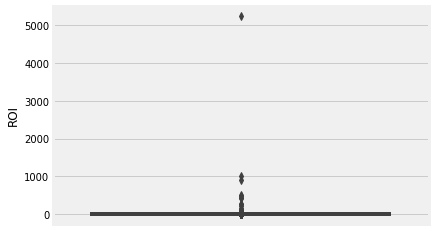

In [42]:
sns.boxplot(data=df, y='ROI')

(-263.32812395, 100.0)

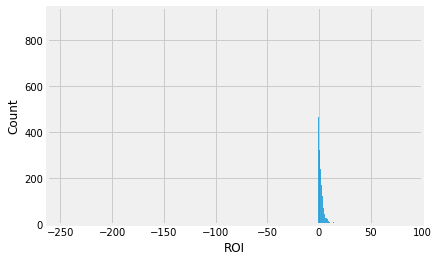

In [43]:
ax = sns.histplot(data=df, x='ROI', )
ax.set_xlim(right=100)

In [44]:
df['successful']  = df['ROI'] >0 
df['successful'].value_counts(1)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_14306/2498529861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['successful']  = df['ROI'] >0


True     0.646735
False    0.353265
Name: successful, dtype: float64

<AxesSubplot:xlabel='successful', ylabel='revenue'>

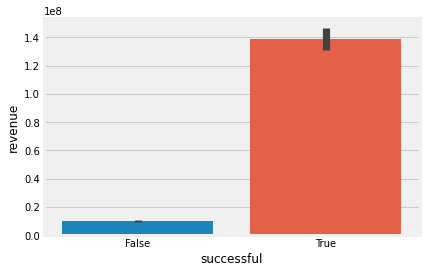

In [45]:
sns.barplot(data=df,x='successful',y='revenue')

## Train Test Split

In [46]:
drop_for_model = ['title','ROI','revenue']
df = df.drop(columns=drop_for_model)
df

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,DayofWeek,MonthName,YearReleased,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,ProdComp_01 Distribution,ProdComp_20th Century Fox,ProdComp_ARD,ProdComp_ARTE,ProdComp_ARTE France Cinéma,ProdComp_BBC Films,ProdComp_Blumhouse Productions,ProdComp_CJ Entertainment,ProdComp_CNC,ProdComp_Canal+,ProdComp_Ciné+,ProdComp_Columbia Pictures,ProdComp_DreamWorks Pictures,ProdComp_Eurimages,ProdComp_Film i Väst,ProdComp_Film4 Productions,ProdComp_Focus Features,ProdComp_France 2 Cinéma,ProdComp_France 3 Cinéma,ProdComp_France Télévisions,ProdComp_Ingenious Media,ProdComp_Kadokawa,ProdComp_Lionsgate,ProdComp_Lotte Entertainment,ProdComp_MISSING,ProdComp_Metro-Goldwyn-Mayer,ProdComp_MiBAC,ProdComp_Miramax,ProdComp_New Line Cinema,ProdComp_Nordisk Film,ProdComp_Paramount,ProdComp_RAI,ProdComp_Relativity Media,ProdComp_Shochiku,ProdComp_Showbox,ProdComp_Star Cinema – ABS-CBN Film Productions,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TVE,ProdComp_The Asylum,ProdComp_Toei Company,ProdComp_Toho,ProdComp_Téléfilm Canada,ProdComp_Universal Pictures,ProdComp_Village Roadshow Pictures,ProdComp_Walt Disney Pictures,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_ZDF,ProdComp_Česká televize,successful
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0118694,0.0,False,150000.0,22.411,99.0,8.1,1868.0,PG,Friday,September,2000.0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
tt0120467,0.0,False,120000.0,5.300,87.0,5.5,40.0,R,Friday,April,2002.0,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0120630,0.0,True,45000000.0,51.339,84.0,6.7,3997.0,G,Wednesday,June,2000.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
tt0120753,0.0,False,8000000.0,8.371,122.0,5.9,247.0,R,Wednesday,February,2000.0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0120755,0.0,True,125000000.0,26.731,123.0,6.1,5279.0,PG-13,Wednesday,May,2000.0,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,F

In [47]:
## Make x and y variables
y = df['successful'].copy()
X = df.drop(columns=['successful']).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,DayofWeek,MonthName,YearReleased,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,ProdComp_01 Distribution,ProdComp_20th Century Fox,ProdComp_ARD,ProdComp_ARTE,ProdComp_ARTE France Cinéma,ProdComp_BBC Films,ProdComp_Blumhouse Productions,ProdComp_CJ Entertainment,ProdComp_CNC,ProdComp_Canal+,ProdComp_Ciné+,ProdComp_Columbia Pictures,ProdComp_DreamWorks Pictures,ProdComp_Eurimages,ProdComp_Film i Väst,ProdComp_Film4 Productions,ProdComp_Focus Features,ProdComp_France 2 Cinéma,ProdComp_France 3 Cinéma,ProdComp_France Télévisions,ProdComp_Ingenious Media,ProdComp_Kadokawa,ProdComp_Lionsgate,ProdComp_Lotte Entertainment,ProdComp_MISSING,ProdComp_Metro-Goldwyn-Mayer,ProdComp_MiBAC,ProdComp_Miramax,ProdComp_New Line Cinema,ProdComp_Nordisk Film,ProdComp_Paramount,ProdComp_RAI,ProdComp_Relativity Media,ProdComp_Shochiku,ProdComp_Showbox,ProdComp_Star Cinema – ABS-CBN Film Productions,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TVE,ProdComp_The Asylum,ProdComp_Toei Company,ProdComp_Toho,ProdComp_Téléfilm Canada,ProdComp_Universal Pictures,ProdComp_Village Roadshow Pictures,ProdComp_Walt Disney Pictures,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_ZDF,ProdComp_Česká televize
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt4667094,0.0,False,20000000.0,81.537,92.0,4.9,1156.0,R,Thursday,January,2016.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt2870756,0.0,False,16800000.0,12.323,98.0,6.5,1805.0,PG-13,Friday,July,2014.0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0120681,0.0,False,35000000.0,33.593,122.0,6.7,2284.0,R,Thursday,February,2001.0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt0120804,0.0,True,33000000.0,35.031,100.0,6.6,5166.0,R,Friday,March,2002.0,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt4701660,0.0,False,60720000.0,44.777,93.0,6.4,258.0,R,Monday,February,2016.0,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [48]:
X_train.isna().sum()

adult                             0
belongs_to_collection             0
budget                            0
popularity                        0
runtime                           1
                                 ..
ProdComp_Walt Disney Pictures     0
ProdComp_Warner Bros. Pictures    0
ProdComp_Wild Bunch               0
ProdComp_ZDF                      0
ProdComp_Česká televize           0
Length: 80, dtype: int64

In [49]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification', 'DayofWeek', 'MonthName']

In [50]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'YearReleased']

In [51]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Comedy',
 'Genre_Music',
 'Genre_Romance',
 'Genre_Science Fiction',
 'Genre_Drama',
 'Genre_Action',
 'Genre_Crime',
 'Genre_Adventure',
 'Genre_Animation',
 'Genre_Fantasy',
 'Genre_Horror',
 'Genre_Thriller',
 'Genre_History',
 'Genre_Family',
 'Genre_Mystery',
 'Genre_Western',
 'Genre_War',
 'Genre_TV Movie',
 'Genre_Documentary',
 'ProdComp_01 Distribution',
 'ProdComp_20th Century Fox',
 'ProdComp_ARD',
 'ProdComp_ARTE',
 'ProdComp_ARTE France Cinéma',
 'ProdComp_BBC Films',
 'ProdComp_Blumhouse Productions',
 'ProdComp_CJ Entertainment',
 'ProdComp_CNC',
 'ProdComp_Canal+',
 'ProdComp_Ciné+',
 'ProdComp_Columbia Pictures',
 'ProdComp_DreamWorks Pictures',
 'ProdComp_Eurimages',
 'ProdComp_Film i Väst',
 'ProdComp_Film4 Productions',
 'ProdComp_Focus Features',
 'ProdComp_France 2 Cinéma',
 'ProdComp_France 3 Cinéma',
 'ProdComp_France Télévisions',
 'ProdComp_Ingenious Media',
 'ProdComp_Kadokawa',
 'ProdComp_Lionsgate',
 'ProdComp_Lotte Entert

In [52]:
## convert manual ohe to int
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)
X_train

,adult,belongs_to_collection,budget,popularity,runtime,vote_average,vote_count,certification,DayofWeek,MonthName,YearReleased,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,ProdComp_01 Distribution,ProdComp_20th Century Fox,ProdComp_ARD,ProdComp_ARTE,ProdComp_ARTE France Cinéma,ProdComp_BBC Films,ProdComp_Blumhouse Productions,ProdComp_CJ Entertainment,ProdComp_CNC,ProdComp_Canal+,ProdComp_Ciné+,ProdComp_Columbia Pictures,ProdComp_DreamWorks Pictures,ProdComp_Eurimages,ProdComp_Film i Väst,ProdComp_Film4 Productions,ProdComp_Focus Features,ProdComp_France 2 Cinéma,ProdComp_France 3 Cinéma,ProdComp_France Télévisions,ProdComp_Ingenious Media,ProdComp_Kadokawa,ProdComp_Lionsgate,ProdComp_Lotte Entertainment,ProdComp_MISSING,ProdComp_Metro-Goldwyn-Mayer,ProdComp_MiBAC,ProdComp_Miramax,ProdComp_New Line Cinema,ProdComp_Nordisk Film,ProdComp_Paramount,ProdComp_RAI,ProdComp_Relativity Media,ProdComp_Shochiku,ProdComp_Showbox,ProdComp_Star Cinema – ABS-CBN Film Productions,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TVE,ProdComp_The Asylum,ProdComp_Toei Company,ProdComp_Toho,ProdComp_Téléfilm Canada,ProdComp_Universal Pictures,ProdComp_Village Roadshow Pictures,ProdComp_Walt Disney Pictures,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_ZDF,ProdComp_Česká televize
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt4667094,0.0,0,20000000.0,81.537,92.0,4.9,1156.0,R,Thursday,January,2016.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt2870756,0.0,0,16800000.0,12.323,98.0,6.5,1805.0,PG-13,Friday,July,2014.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0120681,0.0,0,35000000.0,33.593,122.0,6.7,2284.0,R,Thursday,February,2001.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0120804,0.0,1,33000000.0,35.031,100.0,6.6,5166.0,R,Friday,March,2002.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt4701660,0.0,0,60720000.0,44.777,93.0,6.4,258.0,R,Monday,February,2016.0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt0120824,0.0,0,38000000.0,10.498,111.0,6.4,294.0,R,Tuesday,December,2001.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt0368794,0.0,0,20000000.0,13.596,135.0,6.6,543.0,R,Monday,October,2007.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt3792960,0.0,0,8700000.0,12.012,105.0,6.6,1368.0,NaN,Wednesday,September,2015.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = ColumnTransformer(transformers=[('num',num_pipe, num_cols),
                                             ('cat',cat_pipe,cat_cols)],
                                       verbose_feature_names_out=False, ## SIMPLIFIES NAMES
                                       remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_average', 'vote_count',
                                  'YearReleased']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification', 'DayofWeek', 'MonthName'])],
                  verbose_feature_names_out=False)

In [54]:
## fit the col transformer
preprocessor.fit(X_train)
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=preprocessor.get_feature_names_out(),
                          index=X_train.index)
X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                          columns=preprocessor.get_feature_names_out(),
                          index=X_test.index)
X_train_tf.head()

,adult,budget,popularity,runtime,vote_average,vote_count,YearReleased,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,DayofWeek_Friday,DayofWeek_MISSING,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday,MonthName_April,MonthName_August,MonthName_December,MonthName_February,MonthName_January,MonthName_July,MonthName_June,MonthName_MISSING,MonthName_March,MonthName_May,MonthName_November,MonthName_October,MonthName_September,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,...,ProdComp_01 Distribution,ProdComp_20th Century Fox,ProdComp_ARD,ProdComp_ARTE,ProdComp_ARTE France Cinéma,ProdComp_BBC Films,ProdComp_Blumhouse Productions,ProdComp_CJ Entertainment,ProdComp_CNC,ProdComp_Canal+,ProdComp_Ciné+,ProdComp_Columbia Pictures,ProdComp_DreamWorks Pictures,ProdComp_Eurimages,ProdComp_Film i Väst,ProdComp_Film4 Productions,ProdComp_Focus Features,ProdComp_France 2 Cinéma,ProdComp_France 3 Cinéma,ProdComp_France Télévisions,ProdComp_Ingenious Media,ProdComp_Kadokawa,ProdComp_Lionsgate,ProdComp_Lotte Entertainment,ProdComp_MISSING,ProdComp_Metro-Goldwyn-Mayer,ProdComp_MiBAC,ProdComp_Miramax,ProdComp_New Line Cinema,ProdComp_Nordisk Film,ProdComp_Paramount,ProdComp_RAI,ProdComp_Relativity Media,ProdComp_Shochiku,ProdComp_Showbox,ProdComp_Star Cinema – ABS-CBN Film Productions,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TVE,ProdComp_The Asylum,ProdComp_Toei Company,ProdComp_Toho,ProdComp_Téléfilm Canada,ProdComp_Universal Pictures,ProdComp_Village Roadshow Pictures,ProdComp_Walt Disney Pictures,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_ZDF,ProdComp_Česká televize
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt4667094,0.0,20000000.0,81.537,92.0,4.9,1156.0,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt2870756,0.0,16800000.0,12.323,98.0,6.5,1805.0,2014.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt0120681,0.0,35000000.0,33.593,122.0,6.7,2284.0,2001.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt0120804,0.0,33000000.0,35.031,100.0,6.6,5166.0,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt4701660,0.0,60720000.0,44.777,93.0,6.4,258.0,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0

In [55]:
num_pipe.steps.append

<function list.append(object, /)>

### Functionize ALL of the preprocessing

In [56]:
def get_train_test_split(df_, y_col='successful',add_scaler=False, drop_cols=[]):
    
    ## Make copy of input df
    df = df_.copy()
    
    ## filter columns in drop cols (if exist)
    [df.drop(columns=c,inplace=True) for c in df.columns if c in drop_cols]
    
    
    ## Make x and y variables
    y = df[y_col].copy()
    X = df.drop(columns=[y_col]).copy()

    X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
    

    
    ## make cat selector and using it to save list of column names
    cat_select = make_column_selector(dtype_include='object')
    cat_cols = cat_select(X_train)


    ## make num selector and using it to save list of column names
    num_select = make_column_selector(dtype_include='number')
    num_cols = num_select(X_train)


    ## select manually OHE cols for later
    bool_select = make_column_selector(dtype_include='bool')
    already_ohe_cols = bool_select(X_train)

    ## convert manual ohe to int
    X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
    X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

    ## make pipelines
    cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                           fill_value='MISSING'),
                             OneHotEncoder(handle_unknown='ignore', sparse=False))
    
   
    num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                            )
    if add_scaler:
        num_pipe.steps.append(('scaler',StandardScaler()))
    
    preprocessor = ColumnTransformer(transformers=[('num',num_pipe, num_cols),
                                             ('cat',cat_pipe,cat_cols)],
                                       verbose_feature_names_out=False, ## SIMPLIFIES NAMES
                                       remainder='passthrough')
    

    ## fit the col transformer
    preprocessor.fit(X_train)

    X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                              columns=preprocessor.get_feature_names_out(),
                              index=X_train.index)
    X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                              columns=preprocessor.get_feature_names_out(),
                              index=X_test.index)
    X_train_tf.head()
    return X_train_tf, y_train, X_test_tf, y_test


# Classification Modeling

### def `evaluate_classification`

In [57]:
import sklearn.metrics as metrics
## Solution answer

def evaluate_classification(model,X_test,y_test,X_train=None, y_train=None,
                            classes=None, normalize='true',
                            cmap="Blues",  label="Test Data"): 

    ## Get Predictions
    y_pred = model.predict(X_test)
    
    ## Classification Report / Scores 
    dashes = '---'*20
    print(dashes)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print(dashes)
    print(metrics.classification_report(y_test,y_pred, target_names=classes))
    display(metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                        display_labels=classes,cmap=cmap,
                                                            normalize=normalize))
    # print(dashes)
    

    ## Plot a confusion matrix
#     cm = metrics.confusion_matrix(y_true,y_pred,normalize=normalize,)
# #     # plt.figure(figsize=figsize)
# #     ax = sns.heatmap(cm, annot=True,square=True,cmap=cmap)

#     if classes != None:
#         ## Label classes
#         ax.set_xticklabels(classes)
#         ax.set_yticklabels(classes,rotation=0)

    ## Add axis labels & title
    ax.set_ylabel('True Classes')
    ax.set_xlabel('Predicted Classes')
    ax.set_title('Confusion Matrix');
    plt.show()
    
    
    if (X_train is not None) & (y_train is not None):
        ## Get Predictions
        y_hat_train = model.predict(X_train)

        ## Classification Report / Scores 
        dashes = '---'*20
        print(dashes)
        print(f"[i] CLASSIFICATION REPORT FOR: TRAINING DATA")
        print(dashes)
        print(metrics.classification_report(y_train,y_hat_train, target_names=classes))
        display(metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_hat_train,
                                            display_labels=classes,cmap=cmap,
                                                            normalize=normalize))
    # print(dashes)
    
    

## Model 1: DummyClassifier

In [58]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)
X_train_df

,adult,budget,popularity,runtime,vote_average,vote_count,YearReleased,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,DayofWeek_Friday,DayofWeek_MISSING,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday,MonthName_April,MonthName_August,MonthName_December,MonthName_February,MonthName_January,MonthName_July,MonthName_June,MonthName_MISSING,MonthName_March,MonthName_May,MonthName_November,MonthName_October,MonthName_September,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,...,ProdComp_01 Distribution,ProdComp_20th Century Fox,ProdComp_ARD,ProdComp_ARTE,ProdComp_ARTE France Cinéma,ProdComp_BBC Films,ProdComp_Blumhouse Productions,ProdComp_CJ Entertainment,ProdComp_CNC,ProdComp_Canal+,ProdComp_Ciné+,ProdComp_Columbia Pictures,ProdComp_DreamWorks Pictures,ProdComp_Eurimages,ProdComp_Film i Väst,ProdComp_Film4 Productions,ProdComp_Focus Features,ProdComp_France 2 Cinéma,ProdComp_France 3 Cinéma,ProdComp_France Télévisions,ProdComp_Ingenious Media,ProdComp_Kadokawa,ProdComp_Lionsgate,ProdComp_Lotte Entertainment,ProdComp_MISSING,ProdComp_Metro-Goldwyn-Mayer,ProdComp_MiBAC,ProdComp_Miramax,ProdComp_New Line Cinema,ProdComp_Nordisk Film,ProdComp_Paramount,ProdComp_RAI,ProdComp_Relativity Media,ProdComp_Shochiku,ProdComp_Showbox,ProdComp_Star Cinema – ABS-CBN Film Productions,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TVE,ProdComp_The Asylum,ProdComp_Toei Company,ProdComp_Toho,ProdComp_Téléfilm Canada,ProdComp_Universal Pictures,ProdComp_Village Roadshow Pictures,ProdComp_Walt Disney Pictures,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_ZDF,ProdComp_Česká televize
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt4667094,0.0,20000000.0,81.537,92.0,4.9,1156.0,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt2870756,0.0,16800000.0,12.323,98.0,6.5,1805.0,2014.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt0120681,0.0,35000000.0,33.593,122.0,6.7,2284.0,2001.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt0120804,0.0,33000000.0,35.031,100.0,6.6,5166.0,2002.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt4701660,0.0,60720000.0,44.777,93.0,6.4,258.0,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.36      0.36      0.36       458
        True       0.64      0.64      0.64       813

    accuracy                           0.54      1271
   macro avg       0.50      0.50      0.50      1271
weighted avg       0.54      0.54      0.54      1271



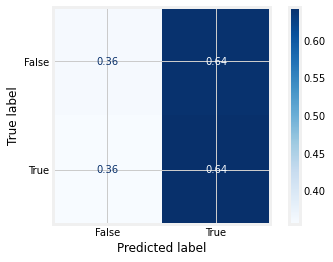

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: TRAINING DATA
------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.35      0.34      0.34      1338
        True       0.65      0.65      0.65      2475

    accuracy                           0.54      3813
   macro avg       0.50      0.50      0.50      3813
weighted avg       0.54      0.54      0.54      3813



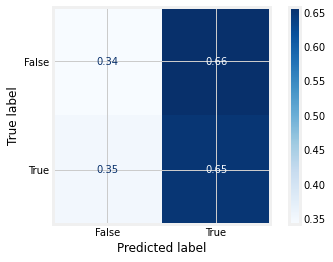

In [59]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='stratified')
clf.fit(X_train_df, y_train)

evaluate_classification(clf, X_test_df, y_test, X_train=X_train_df, y_train=y_train)

> We are definitely violating the assumptions of normal residuals and homoscedasticity.

## Model# 2: Random Forest

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.68      0.60      0.64       458
        True       0.79      0.84      0.81       813

    accuracy                           0.75      1271
   macro avg       0.73      0.72      0.73      1271
weighted avg       0.75      0.75      0.75      1271



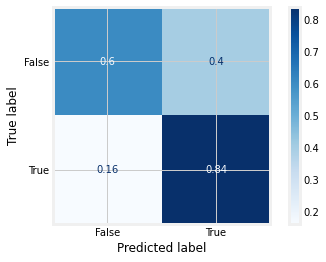

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: TRAINING DATA
------------------------------------------------------------
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1338
        True       1.00      1.00      1.00      2475

    accuracy                           1.00      3813
   macro avg       1.00      1.00      1.00      3813
weighted avg       1.00      1.00      1.00      3813



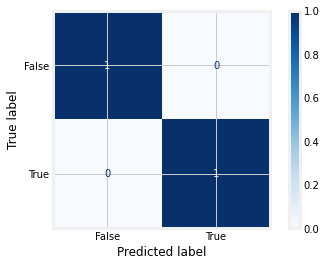

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train_df, y_train)

evaluate_classification(rf_clf, X_test_df, y_test, X_train=X_train_df, y_train=y_train)

## Model 3: LogisticRegression

In [61]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df,add_scaler=False)
X_train_df

,adult,budget,popularity,runtime,vote_average,vote_count,YearReleased,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,DayofWeek_Friday,DayofWeek_MISSING,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday,MonthName_April,MonthName_August,MonthName_December,MonthName_February,MonthName_January,MonthName_July,MonthName_June,MonthName_MISSING,MonthName_March,MonthName_May,MonthName_November,MonthName_October,MonthName_September,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,...,ProdComp_01 Distribution,ProdComp_20th Century Fox,ProdComp_ARD,ProdComp_ARTE,ProdComp_ARTE France Cinéma,ProdComp_BBC Films,ProdComp_Blumhouse Productions,ProdComp_CJ Entertainment,ProdComp_CNC,ProdComp_Canal+,ProdComp_Ciné+,ProdComp_Columbia Pictures,ProdComp_DreamWorks Pictures,ProdComp_Eurimages,ProdComp_Film i Väst,ProdComp_Film4 Productions,ProdComp_Focus Features,ProdComp_France 2 Cinéma,ProdComp_France 3 Cinéma,ProdComp_France Télévisions,ProdComp_Ingenious Media,ProdComp_Kadokawa,ProdComp_Lionsgate,ProdComp_Lotte Entertainment,ProdComp_MISSING,ProdComp_Metro-Goldwyn-Mayer,ProdComp_MiBAC,ProdComp_Miramax,ProdComp_New Line Cinema,ProdComp_Nordisk Film,ProdComp_Paramount,ProdComp_RAI,ProdComp_Relativity Media,ProdComp_Shochiku,ProdComp_Showbox,ProdComp_Star Cinema – ABS-CBN Film Productions,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TVE,ProdComp_The Asylum,ProdComp_Toei Company,ProdComp_Toho,ProdComp_Téléfilm Canada,ProdComp_Universal Pictures,ProdComp_Village Roadshow Pictures,ProdComp_Walt Disney Pictures,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_ZDF,ProdComp_Česká televize
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0375063,0.0,16000000.0,16.303,127.0,7.1,1273.0,2004.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt0422861,0.0,5000000.0,11.800,88.0,5.3,67.0,2006.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt0903624,0.0,250000000.0,94.462,169.0,7.3,15915.0,2012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
tt1320253,0.0,80000000.0,86.139,103.0,6.2,6493.0,2010.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt0407265,0.0,1000000.0,14.101,103.0,7.1,371.0,2005.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.53      0.84      0.65       448
        True       0.87      0.59      0.71       823

    accuracy                           0.68      1271
   macro avg       0.70      0.72      0.68      1271
weighted avg       0.75      0.68      0.69      1271



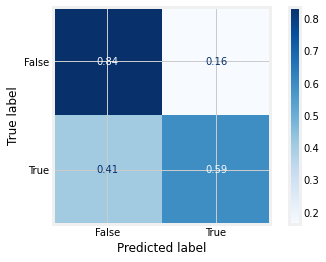

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: TRAINING DATA
------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.52      0.87      0.65      1348
        True       0.89      0.56      0.69      2465

    accuracy                           0.67      3813
   macro avg       0.70      0.72      0.67      3813
weighted avg       0.76      0.67      0.68      3813



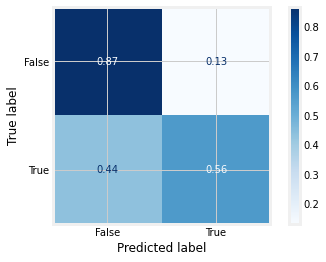

In [62]:
from sklearn.linear_model import LogisticRegressionCV

logreg_clf = LogisticRegressionCV(class_weight='balanced')
logreg_clf.fit(X_train_df, y_train)

evaluate_classification(logreg_clf, X_test_df, y_test, X_train=X_train_df, y_train=y_train)

#### Adding Scaling

In [63]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df,add_scaler=True)
X_train_df

,adult,budget,popularity,runtime,vote_average,vote_count,YearReleased,certification_G,certification_MISSING,certification_NC-17,certification_NR,certification_PG,certification_PG-13,certification_R,DayofWeek_Friday,DayofWeek_MISSING,DayofWeek_Monday,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Thursday,DayofWeek_Tuesday,DayofWeek_Wednesday,MonthName_April,MonthName_August,MonthName_December,MonthName_February,MonthName_January,MonthName_July,MonthName_June,MonthName_MISSING,MonthName_March,MonthName_May,MonthName_November,MonthName_October,MonthName_September,belongs_to_collection,Genre_Comedy,Genre_Music,Genre_Romance,Genre_Science Fiction,Genre_Drama,Genre_Action,Genre_Crime,Genre_Adventure,Genre_Animation,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,...,ProdComp_01 Distribution,ProdComp_20th Century Fox,ProdComp_ARD,ProdComp_ARTE,ProdComp_ARTE France Cinéma,ProdComp_BBC Films,ProdComp_Blumhouse Productions,ProdComp_CJ Entertainment,ProdComp_CNC,ProdComp_Canal+,ProdComp_Ciné+,ProdComp_Columbia Pictures,ProdComp_DreamWorks Pictures,ProdComp_Eurimages,ProdComp_Film i Väst,ProdComp_Film4 Productions,ProdComp_Focus Features,ProdComp_France 2 Cinéma,ProdComp_France 3 Cinéma,ProdComp_France Télévisions,ProdComp_Ingenious Media,ProdComp_Kadokawa,ProdComp_Lionsgate,ProdComp_Lotte Entertainment,ProdComp_MISSING,ProdComp_Metro-Goldwyn-Mayer,ProdComp_MiBAC,ProdComp_Miramax,ProdComp_New Line Cinema,ProdComp_Nordisk Film,ProdComp_Paramount,ProdComp_RAI,ProdComp_Relativity Media,ProdComp_Shochiku,ProdComp_Showbox,ProdComp_Star Cinema – ABS-CBN Film Productions,ProdComp_StudioCanal,ProdComp_TF1 Films Production,ProdComp_TVE,ProdComp_The Asylum,ProdComp_Toei Company,ProdComp_Toho,ProdComp_Téléfilm Canada,ProdComp_Universal Pictures,ProdComp_Village Roadshow Pictures,ProdComp_Walt Disney Pictures,ProdComp_Warner Bros. Pictures,ProdComp_Wild Bunch,ProdComp_ZDF,ProdComp_Česká televize
imdb_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt1155705,-0.016197,-0.305962,-0.220896,1.510294,0.420413,-0.591489,-0.453180,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt6199572,-0.016197,-0.292880,-0.178330,-0.312880,-1.125922,-0.537691,1.649599,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt1181795,-0.016197,-0.196944,-0.188288,0.388341,-0.266847,-0.535563,-0.102717,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt1001526,-0.016197,2.092414,0.267790,-0.640116,0.506320,1.092375,-0.102717,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tt3554046,-0.016197,2.787943,2.770521,0.248097,0.678135,0.327645,1.824830,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env-m1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env-m1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.61      0.84      0.71       464
        True       0.88      0.69      0.78       807

    accuracy                           0.75      1271
   macro avg       0.75      0.77      0.74      1271
weighted avg       0.78      0.75      0.75      1271



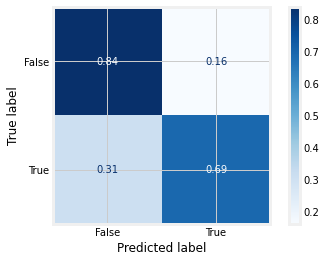

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: TRAINING DATA
------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.60      0.82      0.69      1332
        True       0.88      0.71      0.78      2481

    accuracy                           0.75      3813
   macro avg       0.74      0.76      0.74      3813
weighted avg       0.78      0.75      0.75      3813



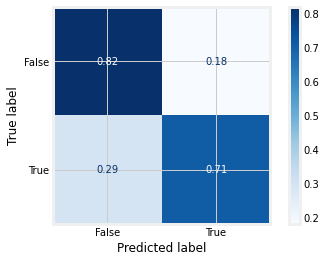

In [64]:
logreg_clf = LogisticRegressionCV(max_iter=200, class_weight='balanced')
logreg_clf.fit(X_train_df, y_train)

evaluate_classification(logreg_clf, X_test_df, y_test, X_train=X_train_df, y_train=y_train)

# APPENDIX: Updating Code Below

- Reference for manipulating pipelines post-creation: [Jessica Miles NLP Project](https://github.com/jess-miles/nlp-sentiment/blob/main/colab_gridsearch.ipynb)

# Model Insights

### Built-In Importances

- Figure saved as Images/rf_clf_importance.png


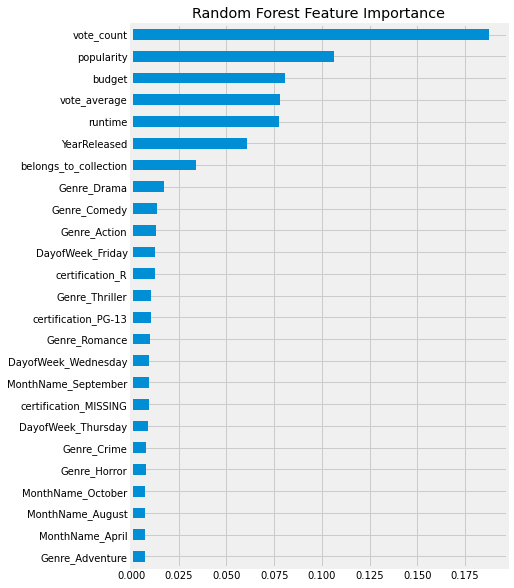

In [65]:
importances = pd.Series(rf_clf.feature_importances_, index=X_train_df.columns)
ax = importances.sort_values().tail(25).plot(kind='barh',figsize=(6,10))
ax.set_title('Random Forest Feature Importance')
pf.savefig('Images/rf_clf_importance.png',ax=ax, facecolor='white')

### Permutation Importance

> Permutation Importances will iteratively shuffle the rows of a single feature at a time to asses the model's change in performance with that feature's relationship with the target disrupted. 
- https://scikit-learn.org/stable/modules/permutation_importance.html

```python
from sklearn.inspection import permutation_importance
r = permutation_importance(svc_linear, X_test_df, y_test, n_repeats=30)
r.keys()
```
- Interesting Observation: 
    - permutation_importance takes a `scoring` argument!

> "**Warning Features that are deemed of low importance for a bad model (low cross-validation score) could be very important for a good model.** Therefore it is always important to evaluate the predictive power of a model using a held-out set (or better with cross-validation) prior to computing importances. Permutation importance does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model."

In [66]:
from sklearn.inspection import permutation_importance

In [67]:
## Permutation importance takes a fit mode and test data. 
r = permutation_importance(rf_clf, X_test_df, y_test,
                           n_repeats=30)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [68]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test_df.columns,
                           name = 'permutation importance')
permutation_importances

adult                             0.000000
budget                           -0.000052
popularity                        0.001574
runtime                           0.000000
vote_average                      0.001810
                                    ...   
ProdComp_Walt Disney Pictures     0.007894
ProdComp_Warner Bros. Pictures    0.001705
ProdComp_Wild Bunch              -0.000656
ProdComp_ZDF                      0.000000
ProdComp_Česká televize           0.000000
Name: permutation importance, Length: 105, dtype: float64

- Figure saved as Images/clf_permutation_importance.png


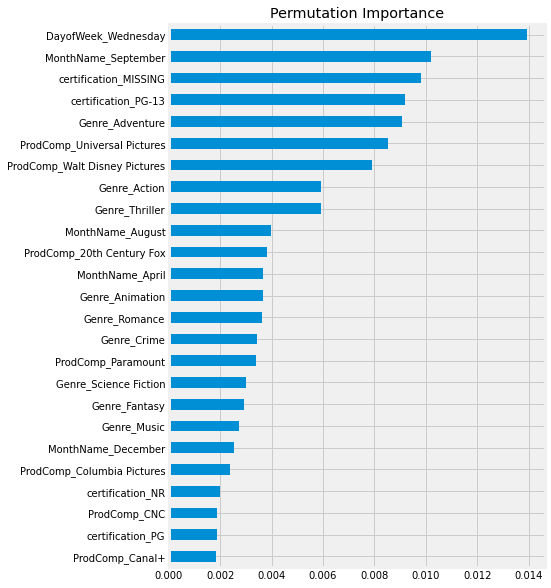

In [69]:
ax = permutation_importances.sort_values().tail(25).plot(kind='barh',figsize=(6,10))
ax.set_title('Permutation Importance')
pf.savefig('Images/clf_permutation_importance.png',ax=ax,facecolor='white')

## Using SHAP and Shapely Values for Model Interpretation

>- SHAP (SHapley Additive exPlanations)) 
    - [Repository](https://github.com/slundberg/shap)
    - [Documentation](https://shap.readthedocs.io/en/latest/?badge=latest)
        - Install via pip or conda.
  

- SHAP uses game theory to calcualte Shapely values for each feature in the dataset. 
- Shapely values are calculated by iteratively testing each feature's contribution to the model by comparing the model's  performance with vs. without the feature. (The "marginal contribution" of the feature to the model's performance).



#### Papers, Book Excerpts, and  Blogs
- [White Paper on Shapely Values](https://arxiv.org/abs/1705.07874)
    
- [Intepretable Machine Learning Book - Section on SHAP](https://christophm.github.io/interpretable-ml-book/shap.html)
    
- Towards Data Science Blog Posts:
    - [Explain Your Model with SHAP Values](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)

    - [Explain Any Model with SHAP KernelExplaibner](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)





#### Videos/Talks:
- Explaining Machine Learning Models (in general).
    - ["Open the Black Box: an intro to Model Interpretability with LIME and SHAP](https://youtu.be/C80SQe16Rao)
- Understanding Shapely/SHAP Values:
    - [AI Simplified: SHAP Values in Machine Learning ](https://youtu.be/Tg8aPwPPJ9c)- (Intuitive Explanation)
    - [Explainable AI explained! | #4 SHAP  ](https://youtu.be/9haIOplEIGM)- (Math Calculation Explanation)


### How to Use Shap

- Uses game theory to explain feature importance and how a feature steered a model's prediction(s) by removing each feature and seeing the effect on the error.

- SHAP has:
    - `TreeExplainer`:
        - compatible with sckit learn, xgboost, Catboost
    - `KernelExplainer`:
        - compatible with "any" model
        


- See [this blog post](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d) for intro to topic and how to use with trees

- For non-tree/random forest models [see this follow up post]( https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

        

### Using Shap for Regression Models
- https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [70]:
import shap 
print(shap.__version__)
shap.initjs()

0.40.0


In [71]:
## Initialize an explainer with the model
explainer = shap.TreeExplainer(rf_clf)

## Calculaate shap values for test data
shap_values = explainer.shap_values(X_test_df,y_test)
len(shap_values)

2



**`shap.summary_plot`**
> - Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.


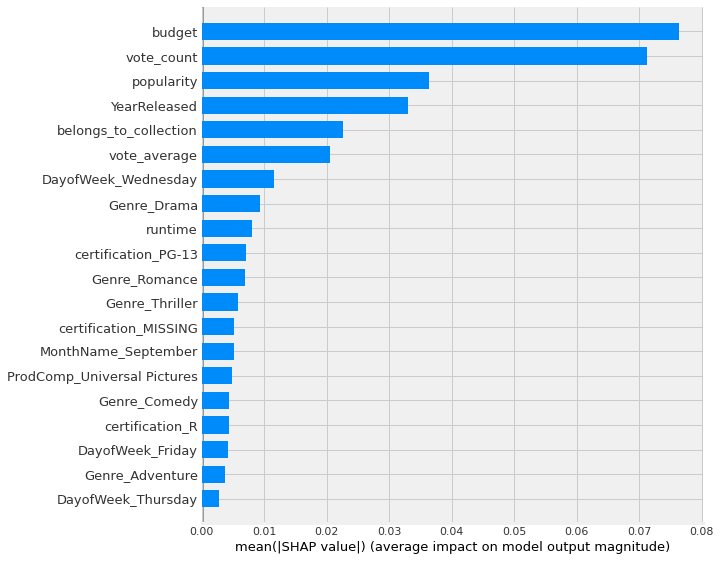

In [72]:
shap.summary_plot(shap_values[1], X_test_df,plot_type='bar')

- Figure saved as Images/rf_shap_summary.png


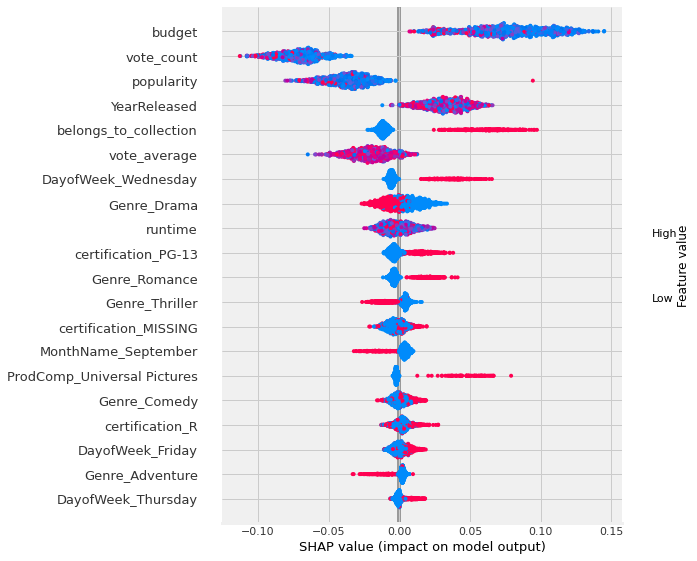

In [73]:
shap.summary_plot(shap_values[1], X_test_df,show=False)
fig = plt.gcf()
pf.savefig('Images/rf_shap_summary.png',fig=fig)

### Shap Dependence Plot

```python
## To Auto-Select Feature Most correlated with a specific feature, just pass the desired feature's column name.

shap.dependence_plot('super_dist', shap_values, X_train)

## There is a way to specifically call out multiple features but I wasn't able to summarize it quickly for this nb
```

In [74]:
# shap.dependence_plot('budget',shap_values[1],X_test_df)